<a href="https://colab.research.google.com/github/Siddharth-Dhurandhar/Bangalore-Traffic-Prediction-using-K-means-clustering/blob/main/MiniProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **Loading Dataset**

---



In [ ]:
!wget -O dataset.csv https://docs.google.com/spreadsheets/d/1IxlpzRDl82binD4MtKysGdCdoncILBn7jD8ZqkLROOU/export?format=csv&gid=92359795
file_path = '/content/dataset.csv'
df=pd.read_csv(file_path)

--2024-10-13 12:10:41--  https://docs.google.com/spreadsheets/d/1IxlpzRDl82binD4MtKysGdCdoncILBn7jD8ZqkLROOU/export?format=csv
Resolving docs.google.com (docs.google.com)... 142.250.157.138, 142.250.157.113, 142.250.157.102, ...
Connecting to docs.google.com (docs.google.com)|142.250.157.138|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://doc-14-9k-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/6qabe1silc1rpmr9pt67jf213k/1728821440000/112620097924294151568/*/1IxlpzRDl82binD4MtKysGdCdoncILBn7jD8ZqkLROOU?format=csv [following]
--2024-10-13 12:10:41--  https://doc-14-9k-sheets.googleusercontent.com/export/54bogvaave6cua4cdnls17ksc4/6qabe1silc1rpmr9pt67jf213k/1728821440000/112620097924294151568/*/1IxlpzRDl82binD4MtKysGdCdoncILBn7jD8ZqkLROOU?format=csv
Resolving doc-14-9k-sheets.googleusercontent.com (doc-14-9k-sheets.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-14-9k-sheets.googleuserc

## **Data Pre-processing**

---



In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
df.shape

(8936, 16)

In [ ]:
df.isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [ ]:
#Label Encoding
df['Roadwork and Construction Activity'] = df['Roadwork and Construction Activity'].map({'Yes': 1, 'No': 0})
df['Area Name'] = df['Area Name'].map({'Indiranagar': 1, 'Whitefield': 2, 'Koramangala': 3, 'M.G. Road': 4, 'Jayanagar': 5, 'Hebbal': 6, 'Yeshwanthpur': 7, 'Electronic City': 8})
df['Road/Intersection Name'] = df['Road/Intersection Name'].map({'100 Feet Road': 1, 'CMH Road': 2, 'Marathahalli Bridge': 3, 'Sony World Junction': 4, 'Sarjapur Road': 5, 'Trinity Circle': 6, 'Anil Kumble Circle': 7, 'Jayanagar 4th Block': 8, 'South End Circle': 9, 'Hebbal Flyover': 10, 'Ballari Road': 11, 'Yeshwanthpur Circle': 12, 'Tumkur Road': 13, 'ITPL Main Road': 14, 'Silk Board Junction': 15, 'Hosur Road': 16 });

#Splitting Dates
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])

In [ ]:
df.shape

(8936, 18)

In [ ]:
# Manually implement one-hot encoding
unique_categories = df['Weather Conditions'].unique()

# Create new columns for each unique category
for category in unique_categories:
    df[f'Weather_{category}'] = df['Weather Conditions'].apply(lambda x: 1 if x == category else 0)

# Drop the original 'Weather Conditions' column
df = df.drop('Weather Conditions', axis=1)

In [ ]:
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,...,Pedestrian and Cyclist Count,Roadwork and Construction Activity,Year,Month,Day,Weather_Clear,Weather_Overcast,Weather_Fog,Weather_Rain,Weather_Windy
0,1,1,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,...,111,0,2022,1,1,1,0,0,0,0
1,1,2,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,...,100,0,2022,1,1,1,0,0,0,0
2,2,3,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,...,189,0,2022,1,1,1,0,0,0,0
3,3,4,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,...,111,0,2022,1,1,1,0,0,0,0
4,3,5,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,...,104,0,2022,1,1,1,0,0,0,0


## **Feature Selection and Analysis**

---



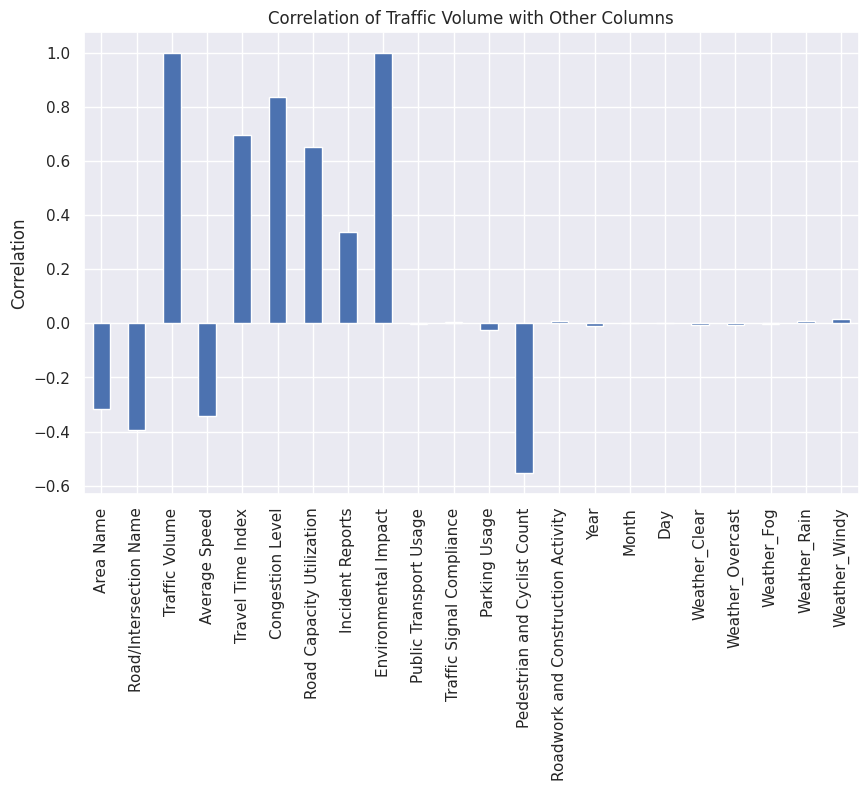

In [ ]:
specific_column = 'Traffic Volume'

# Calculate correlations
correlations = df.corr()[specific_column]

# Plot as a bar chart
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title(f'Correlation of Traffic Volume with Other Columns')
plt.ylabel('Correlation')
plt.show()

In [ ]:
df = df.drop(columns=['Environmental Impact'])

**Separating features and target**

In [ ]:
#Feature Selection

X = df.iloc[:,[0,1,3,4,5,6,7,11]].values
y=df['Traffic Volume']

**Standardization**

In [ ]:
scaler=StandardScaler()
standardized_data=scaler.fit_transform(X)
X=standardized_data

**Splitting into train and test**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(8936, 8) (7148, 8) (1788, 8)


## **Linear Regression**

---



In [ ]:
class MyLR:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calculate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train))
        betas=np.dot(betas,X_train.T)
        betas=np.dot(betas,y_train)

        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred

## **Determination of R2_Score using Linear Regression**

---



In [ ]:
model = MyLR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 45904634.61487511
R-squared: 0.726431762358268


## **K-Means**

---

In [ ]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,11]].values  #Feature Selection for K-means
X

array([[1.00000000e+00, 1.00000000e+00, 5.05900000e+04, ...,
        1.00000000e+02, 0.00000000e+00, 1.11000000e+02],
       [1.00000000e+00, 2.00000000e+00, 3.08250000e+04, ...,
        1.00000000e+02, 1.00000000e+00, 1.00000000e+02],
       [2.00000000e+00, 3.00000000e+00, 7.39900000e+03, ...,
        3.63965249e+01, 0.00000000e+00, 1.89000000e+02],
       ...,
       [4.00000000e+00, 7.00000000e+00, 4.28220000e+04, ...,
        1.00000000e+02, 1.00000000e+00, 1.10000000e+02],
       [5.00000000e+00, 9.00000000e+00, 2.05400000e+04, ...,
        9.78455274e+01, 2.00000000e+00, 9.40000000e+01],
       [7.00000000e+00, 1.20000000e+01, 1.47050000e+04, ...,
        7.77346208e+01, 1.00000000e+00, 2.01000000e+02]])

In [ ]:
import random

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.random_state = random_state
        self.inertia_ = None  # Adding inertia attribute

    def fit_predict(self, X):

        # Set the random seed if random_state is provided
        if self.random_state is not None:
            random.seed(self.random_state)

        # Select random initial centroids
        random_index = random.sample(range(0, X.shape[0]), self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # Assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # Move centroids
            self.centroids = self.move_centroids(X, cluster_group)
            # Check for convergence
            if np.array_equal(old_centroids, self.centroids):
                break

        # Calculate inertia (WCSS)
        self.inertia_ = self.calculate_inertia(X, cluster_group)

        return cluster_group

    def assign_clusters(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self, X, cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

    def calculate_inertia(self, X, cluster_group):
        """Calculates the within-cluster sum of squares (WCSS)."""
        inertia = 0
        for i, centroid in enumerate(self.centroids):
            cluster_points = X[cluster_group == i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia

## **Using *ELBOW* method to find Optimal Number of Clusters**

---

In [ ]:
wcss = []

for i in range(1,8):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit_predict(X)

  wcss.append(kmeans.inertia_)

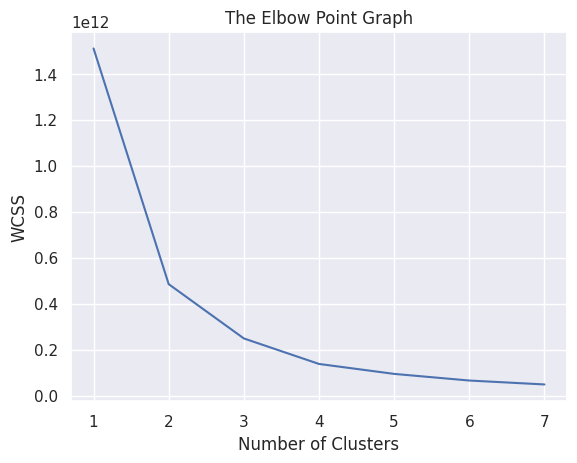

In [ ]:
# Plotting WCSS
sns.set()
plt.plot(range(1,8), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## **Finding Cluster Label for each Datapoint**

---

In [ ]:
#Selected 4 clusters
kmeans = KMeans(n_clusters=4,random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)
print(Y)

[3 0 1 ... 2 0 1]


In [ ]:
#Adding "Cluster" Label to DataFrame
df['Cluster']=Y

In [ ]:
df.head()

,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,...,Roadwork and Construction Activity,Year,Month,Day,Weather_Clear,Weather_Overcast,Weather_Fog,Weather_Rain,Weather_Windy,Cluster
0,1,1,50590,50.230299,1.500000,100.000000,100.000000,0,70.632330,84.044600,...,0,2022,1,1,1,0,0,0,0,3
1,1,2,30825,29.377125,1.500000,100.000000,100.000000,1,41.924899,91.407038,...,0,2022,1,1,1,0,0,0,0,0
2,2,3,7399,54.474398,1.039069,28.347994,36.396525,0,44.662384,61.375541,...,0,2022,1,1,1,0,0,0,0,1
3,3,4,60874,43.817610,1.500000,100.000000,100.000000,1,32.773123,75.547092,...,0,2022,1,1,1,0,0,0,0,3
4,3,5,57292,41.116763,1.500000,100.000000,100.000000,3,35.092601,64.634762,...,0,2022,1,1,1,0,0,0,0,3


In [ ]:
#Feature Selection for Linear Regression (After Clustering)
X = df.iloc[:,[0,1,3,4,5,6,7,11,21]].values

In [ ]:
standardized_data=scaler.fit_transform(X)
X=standardized_data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## **Correlation Visualization with Traffic Volume**

---

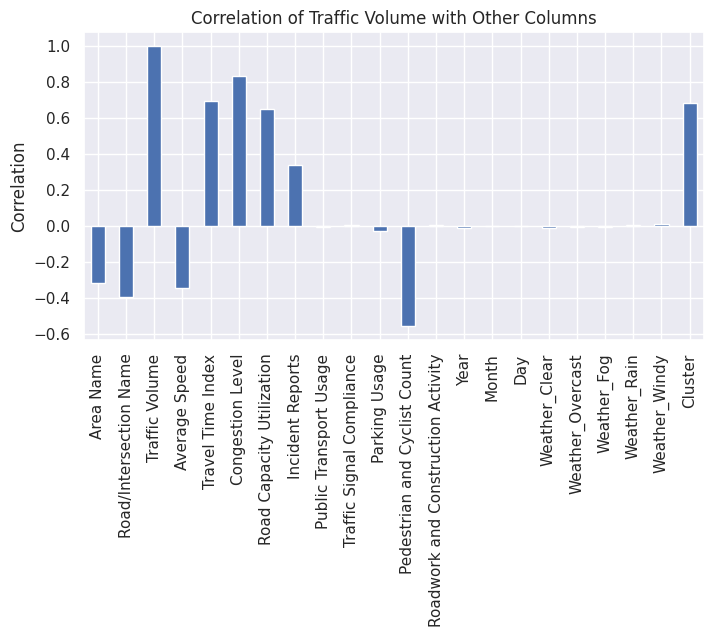

In [ ]:
# Calculate correlations
correlations = df.corr()['Traffic Volume']

# Plot as a bar chart
plt.figure(figsize=(8, 4))
correlations.plot(kind='bar')
plt.title(f'Correlation of Traffic Volume with Other Columns')
plt.ylabel('Correlation')
plt.show()

## **Determination of R2_Score using Linear Regression (After Clustering)**

---

In [ ]:
model = MyLR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18020023.350861028
R-squared: 0.8926098405593133
